# 머신러닝

```
지도학습 : 분류 / 회귀
비지도 학습 : 군집화/연관성 분석
```

### 지도학습 - 분류분석 - kNN
- k-NN 알고리즘에서 k-NN은 k-최근접 이웃k-Nearest Neightbor의 약자로 특징 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결 방식으로 데이터의 레이블을 할당 하는 분류방식  
- k-NN 알고리즘은 특정 공간에 있는 모든 데이터에 대한 정보가 필요
- 데이터 인스턴스, 클래스, 특징의 요소들의 개수가 많다면, 많은 메모리 공간과 계산 시간이 필요하다는 단점
- 알고리즘이 매우 단순하고 직관적이며, 사전학습이나 특별한 준비 시간이 필요 없다는 점은 장점

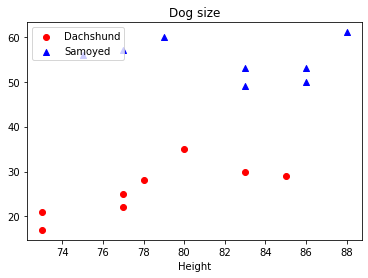

In [1]:
import matplotlib.pyplot as plt
import numpy as np

dach_length = [77,78,85,83,73,77,73,80]
dach_height = [25,28,29,30,21,22,17,35]

samo_length = [75,77,86,86,79,83,83,88]
samo_height = [56,57,50,53,60,53,49,61]

plt.scatter(dach_length, dach_height, c = "red", label = "Dachshund")
plt.scatter(samo_length, samo_height, c = "blue", marker = '^', label = "Samoyed")

plt.xlabel("Length")
plt.xlabel("Height")
plt.title("Dog size")
plt.legend(loc = "upper left")

plt.show()

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

dach_length = [77,78,85,83,73,77,73,80]
dach_height = [25,28,29,30,21,22,17,35]

samo_length = [75,77,86,86,79,83,83,88]
samo_height = [56,57,50,53,60,53,49,61]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링
s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data)) #사모예드는 1로 레이블링

newdata = [[79,35]]

dogs = np.concatenate((d_data, s_data)) #axis=0
labels = np.concatenate((d_label, s_label))

dog_classes = {0:'Dachshund', 1:'Samoyed'}

k = 3 #k를 3으로 두고 KNN 분류기를 만들어보자
knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(dogs,labels)
y_pred = knn.predict(newdata)
print('데이터',newdata,', 판정 결과: ', dog_classes[y_pred[0]])

데이터 [[79, 35]] , 판정 결과:  Dachshund


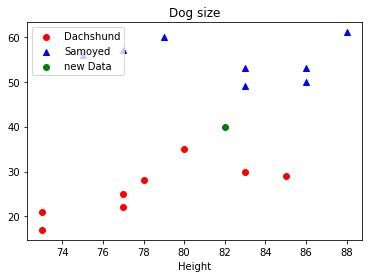

In [3]:
### 도전문제 5.1
dach_length = [77,78,85,83,73,77,73,80]
dach_height = [25,28,29,30,21,22,17,35]

samo_length = [75,77,86,86,79,83,83,88]
samo_height = [56,57,50,53,60,53,49,61]

newdata_length = [82]
newdata_height = [40]

plt.scatter(dach_length, dach_height, c = "red", label = "Dachshund")
plt.scatter(samo_length, samo_height, c = "blue", marker = '^', label = "Samoyed")
plt.scatter(newdata_length,newdata_height, c = "green",label = "new Data")
plt.xlabel("Length")
plt.xlabel("Height")
plt.title("Dog size")
plt.legend(loc = "upper left")

plt.show()

In [4]:
d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data)) #닥스훈트는 0으로 레이블링
s_data = np.column_stack((samo_length, samo_height))
s_label = np.ones(len(s_data)) #사모예드는 1로 레이블링

newdata = [[82,40]]

dogs = np.concatenate((d_data, s_data)) #axis=0
labels = np.concatenate((d_label, s_label))

dog_classes = {0:'Dachshund', 1:'Samoyed'}

a = [1,5,9]
for i in range(len(a)):
    k = a[i]
    knn.fit(dogs,labels)
    y_pred = knn.predict(newdata)
    print('k =', k, '일때  판정 결과: ', dog_classes[y_pred[0]])

k = 1 일때  판정 결과:  Dachshund
k = 5 일때  판정 결과:  Dachshund
k = 9 일때  판정 결과:  Dachshund


### iris

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

import pandas as pd

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
iris_df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [8]:
# X와 y를 훈련 데이터와 검증데이터로 구분하여 k-NN 알고리즘을 적용시키고 정확도를 측정
X = iris_df.iloc[:,:4]
y = iris_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(X,y,k):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return metrics.accuracy_score(y_test,y_pred)

k = 3
scores = iris_knn(X,y,k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k,scores))

n_neighbors가 3일때 정확도: 0.956


In [12]:
### 도전문제 5.2
# n_neighbors가 1,5,10,20,30일 때의 정확도를 각각 다음 같이 출력하여라.
b = [1,5,10,20,30]
for i in range(len(b)):
    k = b[i]
    scores = iris_knn(X,y,k)
    print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k,scores))

n_neighbors가 1일때 정확도: 0.889
n_neighbors가 5일때 정확도: 0.978
n_neighbors가 10일때 정확도: 0.933
n_neighbors가 20일때 정확도: 0.978
n_neighbors가 30일때 정확도: 0.978


In [21]:
### 새로운 꽃에 대해서 모델을 적용하고 분류해보기
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(iris.data, iris.target)

classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# 새로운 데이터를 제시해보자.
X = [[4,2,1.3,0.4],[4,3,3.2,2.2]]
y = knn.predict(X)

print('{} 특성을 가지는 품종 : {}'.format(X[0], classes[y[0]]))
print('{} 특성을 가지는 품종 : {}'.format(X[1], classes[y[1]]))

y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target,y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

[4, 2, 1.3, 0.4] 특성을 가지는 품종 : setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종 : versicolor
n_neighbors가 3일때 정확도: 0.960


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x244d79f36d0>)

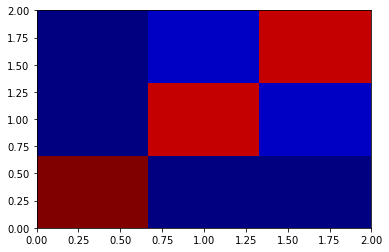

In [23]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap = plt.cm.jet)

### 혼동행렬 confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [26]:
## 표집 편향과 성능 측정을 위한 평가지표
def classifier_A(length, height): #입력값에 관계없이 'Samoyed'를 반환
    return 'Samoyed'

### 정밀도와 재현도

In [27]:
target = np.array([0]* 10 + [1] * 10)
target # 10개의 0(Negative), 10개의 1(Positive)를 가짐

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
pred = np.array([0,0,0,0,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1])
pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [29]:
# 목표값과 예측값을 혼동행렬로 표시
from sklearn.metrics import confusion_matrix
confusion_matrix(target, pred) #혼동행렬 만들기

array([[7, 3],
       [2, 8]], dtype=int64)

In [31]:
# F1점수
from sklearn.metrics import precision_score, recall_score
print("정밀도 : ", precision_score(target, pred))
print("재현율 : ", recall_score(target, pred))

from sklearn.metrics import accuracy_score, f1_score
print("정확도 : ", accuracy_score(target, pred))
print("F1 점수 : ", f1_score(target, pred))

정밀도 :  0.7272727272727273
재현율 :  0.8
정확도 :  0.75
F1 점수 :  0.761904761904762


In [32]:
### 도전문제 5.3
# 입력데이터가 10,000개이고, 이 중 9,900개가 사모예드, 100개가 닥스훈트라 하자. 
# classifier_A로 분류했을 때, 정밀도, 재현도, 정확도, F1 점수를 계산하라.

target1 = np.array([1]*9900 + [0]*100)
predict1 = np.array([1]*10000)

#혼동행렬 만들기
from sklearn.metrics import confusion_matrix
confusion_matrix(target1, predict1)

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, f1_score

print("정밀도 : ", precision_score(target1, predict1))
print("재현율 : ", recall_score(target1, predict1))
print("정확도 : ", accuracy_score(target1, predict1))
print("F1 점수 : ", f1_score(target1, predict1))


정밀도 :  0.99
재현율 :  1.0
정확도 :  0.99
F1 점수 :  0.9949748743718593
